## Series Temporales - Trabajo Práctico
### Alumna: Ariadna Garmendia

### Tema: Análisis de cantidad de pasajeros que pasaron por los molinetes del subte en la Ciudad Autónoma de Buenos Aires entre 2017 y 2019.

### EVALUACIÓN DEL MODELO

#### Entre los tres modelos calculados, seleccionaría el 3 porque es el que tiene menor AIC y BIC. Sin embargo, AIC y BIC me permite elegir entre varios modelos, pero es un criterio que no da información sobre qué tan bueno es el modelo en sí.
#### Para determinar esto voy a hacer un análisis de los residuos:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
import seaborn as sns
from scipy.stats import boxcox 
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.statespace import sarimax
from scripts.import_data import data #Importo mis scripts
from scripts.models import evaluate_model, get_resid_info #Importo mis scripts

In [2]:
# Importo los datos procesados en otras notebooks
molinetes, rolling_median, difference, de_trend = data()

In [3]:
#Serie suavizada con mediana móvil y k=30
smoothed = pd.DataFrame(rolling_median.result_30.iloc[30:])

In [4]:
#Parámetros del mejor modelo (ver Notebook 05)
my_order_3 = (1, 0, 1) #(p,d,q)
my_seasonal_order_3 = (1, 0, 0, 7) #(P,D,Q,s)
_, result_3 = evaluate_model(smoothed, my_order_3, my_seasonal_order_3) 

/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:99

                                     SARIMAX Results                                      
Dep. Variable:                          result_30   No. Observations:                 1062
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 7)   Log Likelihood              -11565.006
Date:                            Wed, 05 Oct 2022   AIC                          23138.011
Time:                                    04:38:55   BIC                          23157.883
Sample:                                         0   HQIC                         23145.542
                                           - 1062                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.001   1616.628      0.000       0.999       1.001
ma.L1          0.2022      0.013   

In [5]:
#Normalizo residuos del modelo
resid = result_3.resid
resid_norm = (resid-resid.mean())/resid.std()

RESIDUALS STATISTICS 
 count      1062.000000
mean       1111.982110
std       26466.134724
min      -75582.270477
25%       -3336.789945
50%         184.953576
75%        3905.992021
max      754134.000000
dtype: float64


/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


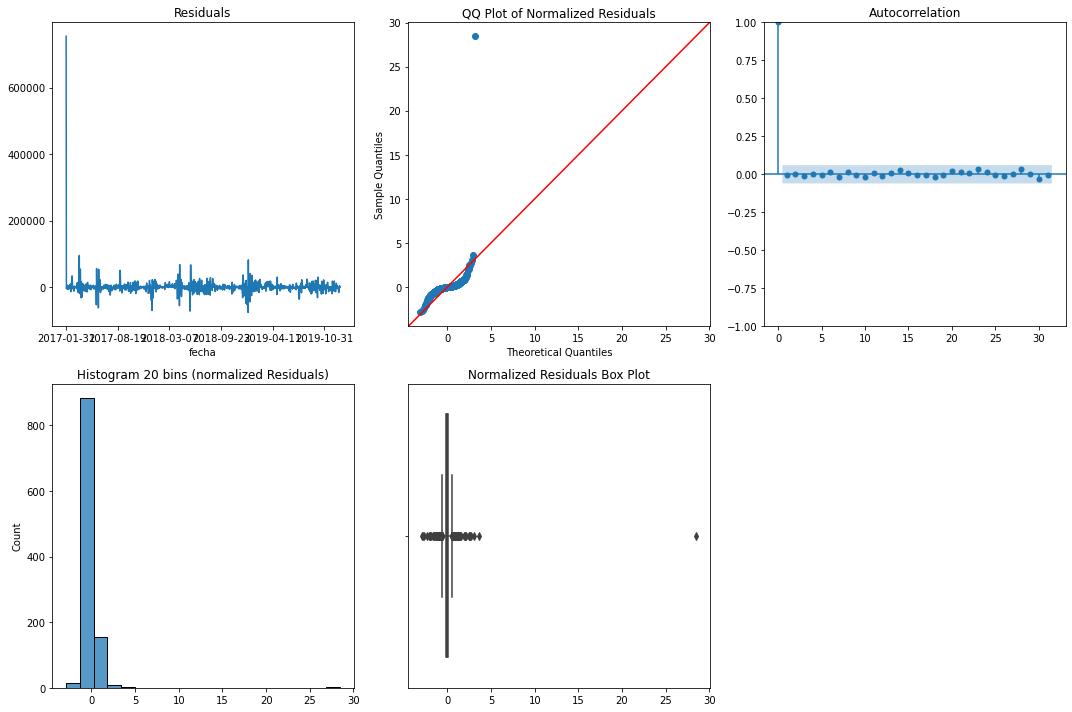

In [6]:
get_resid_info(result_3.resid, 20)

#### Pruebo eliminando de los residuos el primer punto

RESIDUALS STATISTICS 
 count     1061.000000
mean       402.253535
std      12871.187659
min     -75582.270477
25%      -3343.153123
50%        183.381929
75%       3898.633916
max      95619.636563
dtype: float64


/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


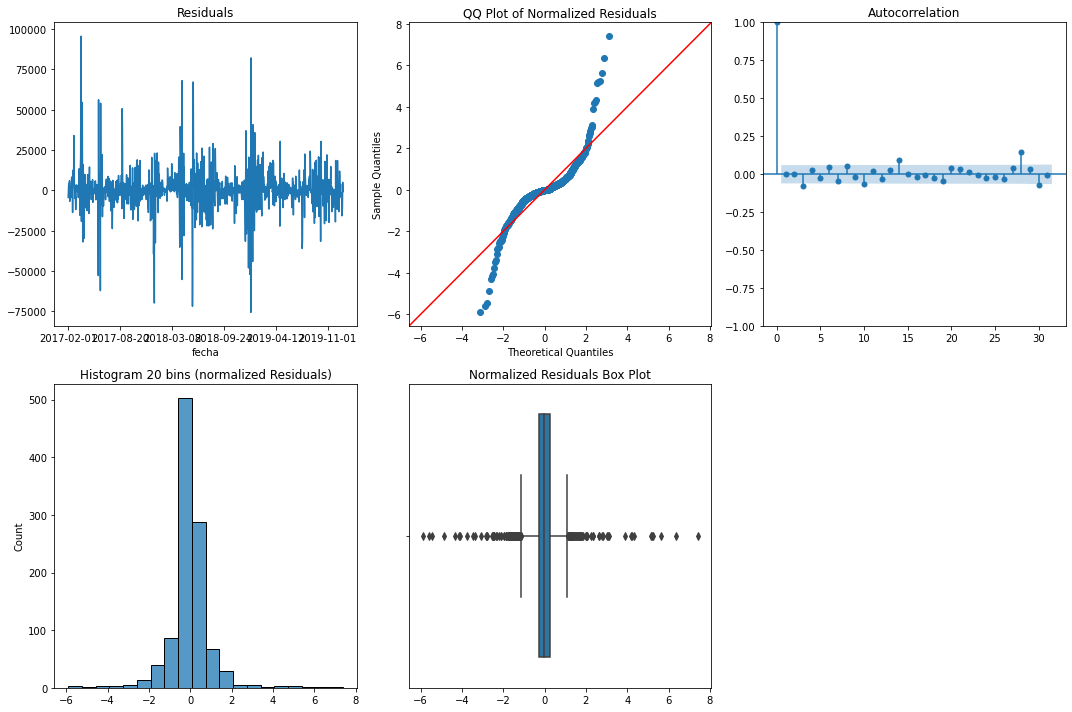

In [7]:
get_resid_info(result_3.resid[1:1062], 20)